## Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time

from cv2 import dnn_superres

AttributeError: partially initialized module 'cv2' has no attribute 'gapi_wip_gst_GStreamerPipeline' (most likely due to a circular import)

## Initialize the Super Resolution Object

In [ ]:
# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

## Read Image

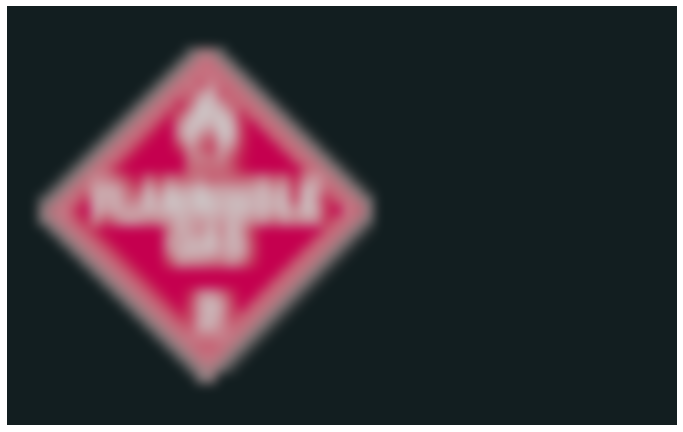

In [ ]:
# Read image
image = cv2.imread("C:\Users\Neosys\Documents\Robótica 2022\RoboCup2022 - Thailand\RoboCup_Junior_Material\Codigo\Sensores\Camaras\SuperResolution\Media\Sign.png")

# Display image

plt.figure(figsize=[12,12])
plt.imshow(image[:,:,::-1], interpolation = 'bicubic');plt.axis('off');

## Extracting Model Name & Scale

In [ ]:
# Define model path
model_path = "Codigo\Sensores\Camaras\SuperResolution\models\LapSRN_x8.pb"

# Extract model name 
model_name =  model_path.split('/')[1].split('_')[0].lower()

# Extract model scale
model_scale = int(model_path.split('/')[1].split('_')[1].split('.')[0][1])

# Display the name and scale
print("model name: "+ model_name)
print("model scale: " + str(model_scale))

model name: lapsrn
model scale: 8


## Reading the Model

In [ ]:
# Read the desired model
sr.readModel(model_path)

## Setting Model Name & Scale

In [ ]:
# Set the desired model and scale to get correct pre-processing and post-processing
sr.setModel(model_name, model_scale)

## Running the Network

In [ ]:
%%time
# Upscale the image
Final_Img = sr.upsample(image)

CPU times: user 2.62 s, sys: 89.7 ms, total: 2.71 s
Wall time: 514 ms


### Check the Shapes

In [ ]:
print('Shape of Original Image: {} , Shape of Super Resolution Image: {}'.format(image.shape, Final_Img.shape))

Shape of Original Image: (40, 64, 3) , Shape of Super Resolution Image: (320, 512, 3)


## Comparing the Original Image & Result

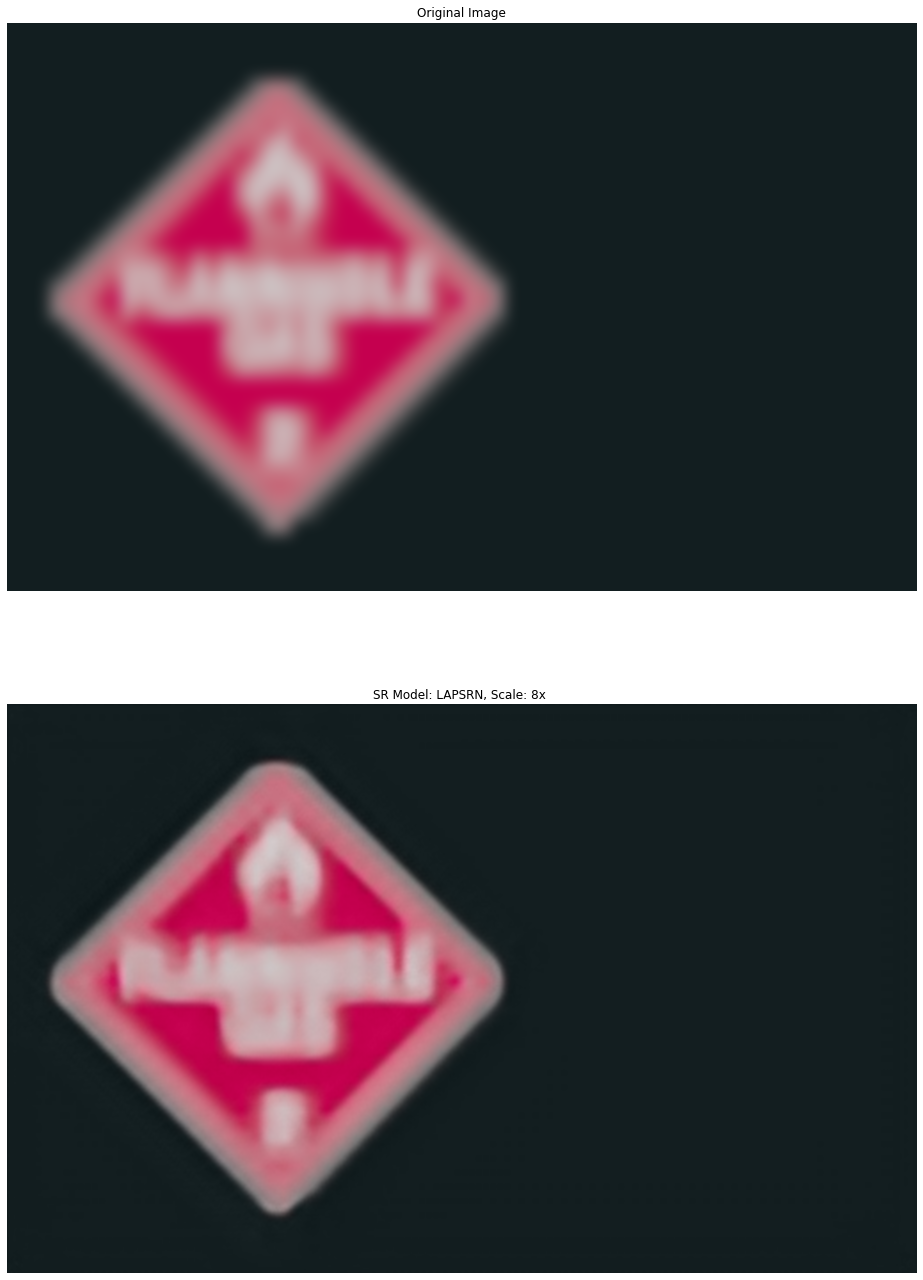

In [ ]:
# Display Image
plt.figure(figsize=[23,23])
plt.subplot(2,1,1);plt.imshow(image[:,:,::-1], interpolation = 'bicubic');plt.title("Original Image");plt.axis("off");
plt.subplot(2,1,2);plt.imshow(Final_Img[:,:,::-1], interpolation = 'bicubic');
plt.title("SR Model: {}, Scale: {}x ".format(model_name.upper(),model_scale)); plt.axis("off");

## Save the High Resolution Image

In [ ]:
# Save the image
cv2.imwrite("outputs/testoutput.png", Final_Img);

## Creating Functions

## Initialization Function

In [ ]:
def init_super(model, base_path='models'):
    
    # Define global variable
    global sr, model_name, model_scale
    
    # Create an SR object
    sr = dnn_superres.DnnSuperResImpl_create()
    
    # Define model path
    model_path = os.path.join(base_path , model +".pb")
    
    # Extract model name from model path
    model_name = model.split('_')[0].lower()
    
    # Extract model scale from model path
    model_scale = int(model.split("_")[1][1])
        
    # Read the desired model
    sr.readModel(model_path)
    
    sr.setModel(model_name, model_scale)

## Main Function 

In [ ]:
def super_res(image, returndata=False, save_img=True, name='test.png', print_shape=True):
    
    # Upscale the image
    Final_Img = sr.upsample(image)
    
    if  returndata:
        return Final_Img
    
    else:
        
        if print_shape:
            print('Shape of Original Image: {} , Shape of Super Resolution Image: {}'.format(image.shape, Final_Img.shape))
            
            
        if save_img:
            cv2.imwrite("outputs/" + name, Final_Img)
        
        
        plt.figure(figsize=[25,25])
        plt.subplot(2,1,1);plt.imshow(image[:,:,::-1], interpolation = 'bicubic');plt.title("Original Image");plt.axis("off");
        plt.subplot(2,1,2);plt.imshow(Final_Img[:,:,::-1], interpolation = 'bicubic');
        plt.title("SR Model: {}, Scale: {}x ".format(model_name.upper(), model_scale)); plt.axis("off");

**Now that we have created the initialization function and a main function, lets use all the 4 models**

### Initialize Enhanced Deep Residual Network  (EDSR, 4x Resolution)

In [ ]:
init_super("EDSR_x4")
#manh, nature, butterfly (last)

### Run the network

In [ ]:
%%time
image = cv2.imread("/home/iita/Documentos/SuperResolution/Media/bird2.JPG")
super_res(image, name= 'enhanced_bird2.jpg')

### Initialize Efficient Subpixel Convolutional Network (ESPCN, 4x Resolution)

In [ ]:
init_super("ESPCN_x4")

### Run the network

Shape of Original Image: (256, 256, 3) , Shape of Super Resolution Image: (1024, 1024, 3)
CPU times: user 368 ms, sys: 4.22 ms, total: 372 ms
Wall time: 149 ms


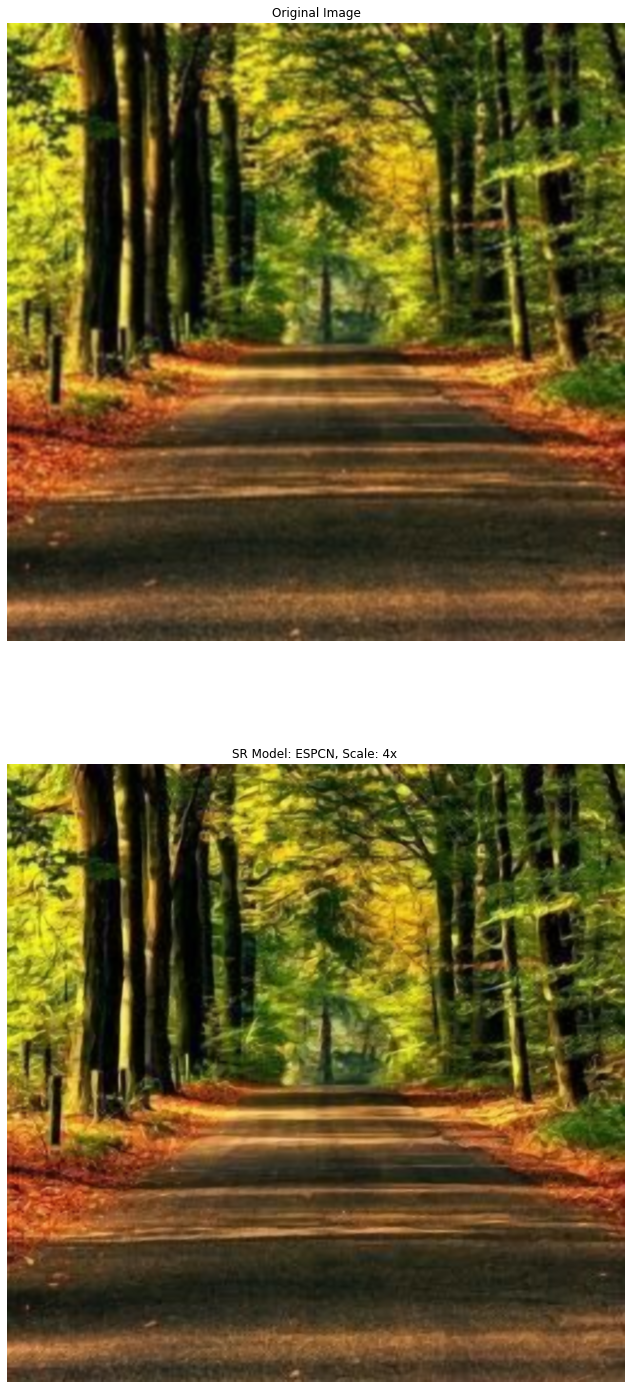

In [ ]:
%%time
image = cv2.imread("Media/road.jpg")
super_res(image, name='enhanced_road.jpg')

### Initialize Fast Super-Resolution Convolutional Neural Networks (FSRCNN, 3x Resolution)

In [ ]:
init_super("FSRCNN_x3")

### Run the network

Shape of Original Image: (232, 270, 3) , Shape of Super Resolution Image: (696, 810, 3)
CPU times: user 875 ms, sys: 24.2 ms, total: 899 ms
Wall time: 246 ms


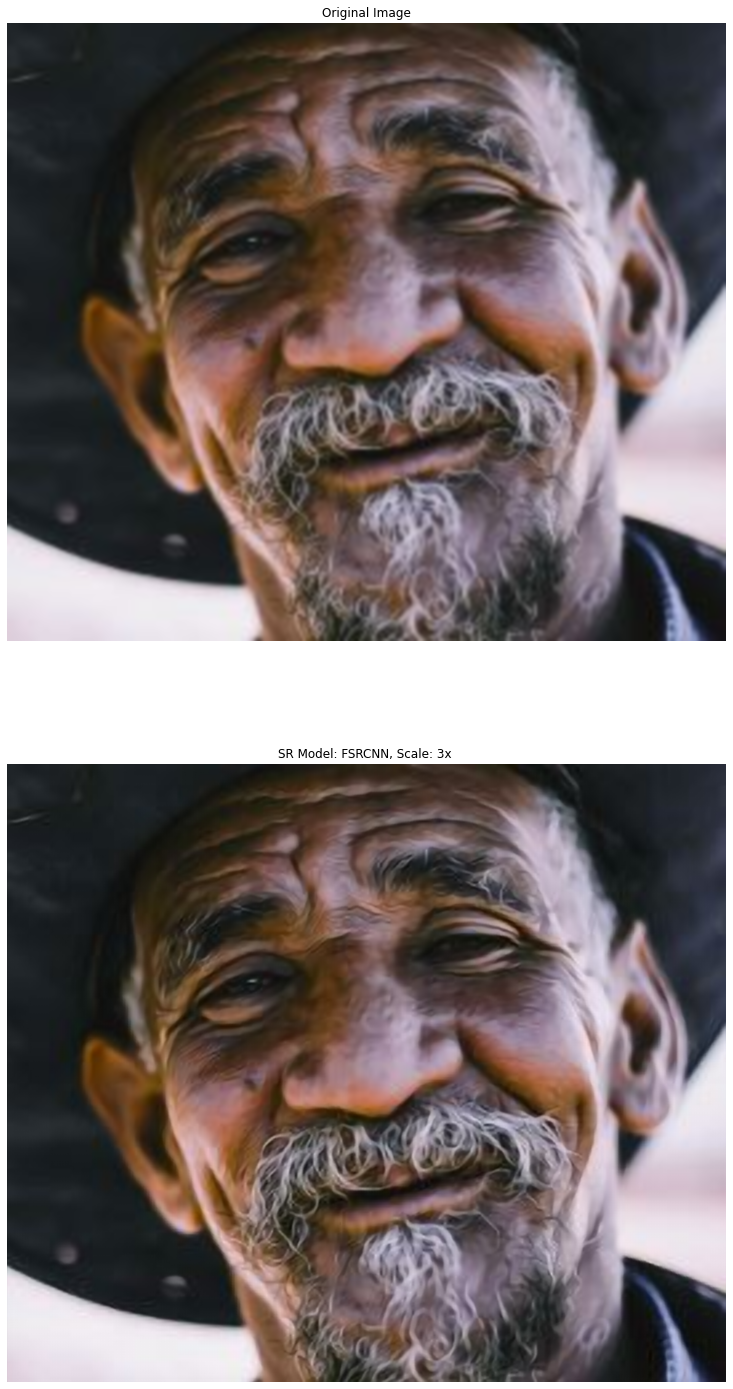

In [ ]:
%%time
image = cv2.imread("/home/iita/Documentos/SuperResolution/Media/manh.JPG")
super_res(image, name = 'enhanced_manh.jpg')

### Initialize Laplacian Pyramid Super-Resolution Network (LapSRN, 8x Resolution)

In [ ]:
init_super("LapSRN_x8")

### Run the network

Shape of Original Image: (302, 357, 3) , Shape of Super Resolution Image: (2416, 2856, 3)
CPU times: user 3min 4s, sys: 4.92 s, total: 3min 9s
Wall time: 34.3 s


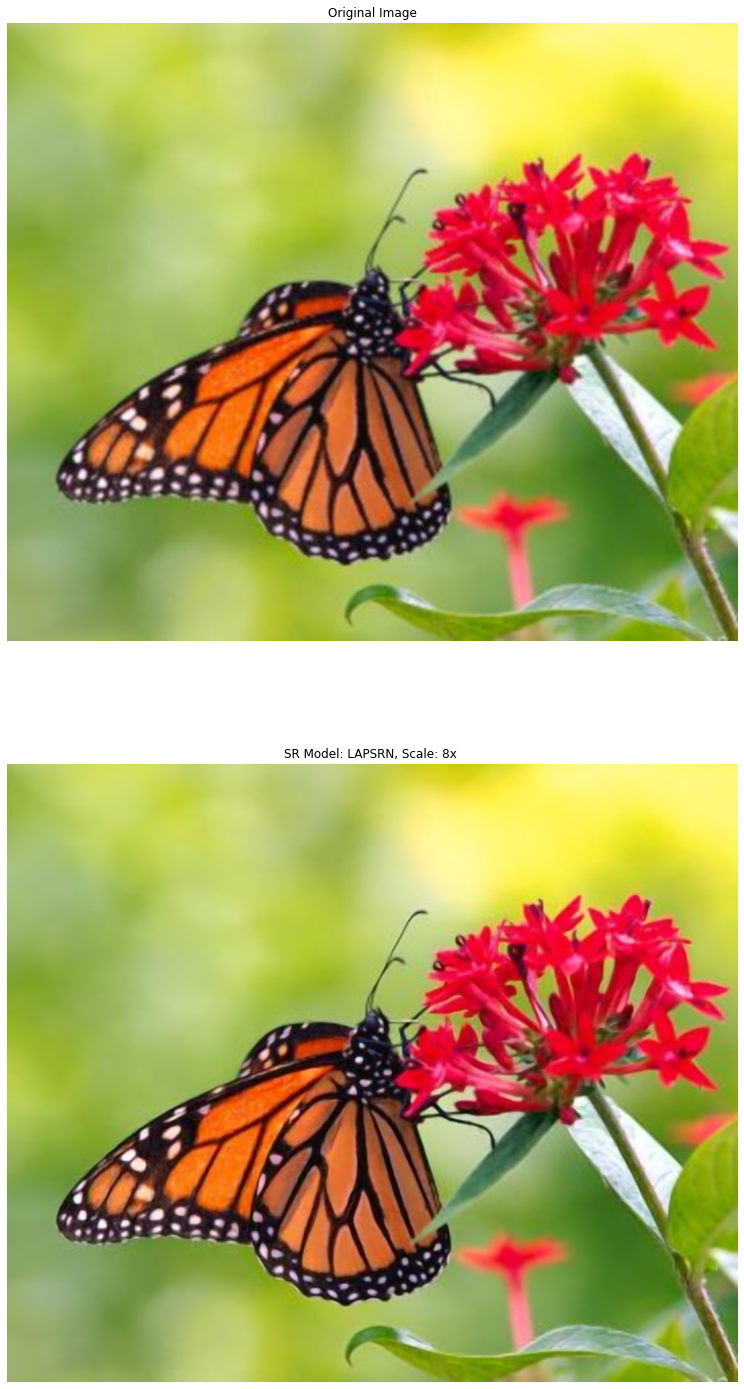

In [ ]:
%%time
image = cv2.imread("/home/iita/Documentos/SuperResolution/Media/butterfly.JPG")
super_res(image, name='enhanced_butterfly.jpg')

## <font style="color:rgb(134,19,348)"> Applying Super Resolution on Video</font>

This code lets you run Super resolution on Videos, you might also want to save the High res video using the [VideoWriter Class](https://docs.opencv.org/4.2.0/dd/d43/tutorial_py_video_display.html).

In [ ]:
fps=0
init_super("ESPCN_x4")
cap = cv2.VideoCapture('/home/iita/Documentos/SuperResolution/Media/demo1.mp4')


while(True):    
    
    start_time = time.time()
    ret,frame=cap.read() 
    
    if not ret:
        break
        
    image = cv2.flip(frame,1)
    
    image = super_res(image, returndata=True)
    
    cv2.putText(image, 'FPS: {:.2f}'.format(fps), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 20, 55), 1)
    cv2.imshow("Super Resolution", image)
    
    k = cv2.waitKey(1)
    fps= (1.0 / (time.time() - start_time))
    
    if k == ord('q'):
        break
cap.release() 
cv2.destroyAllWindows() 

KeyboardInterrupt: 